In [2]:
from esys.escript import *
# This defines the LinearPDE module as LinearPDE
from esys.escript.linearPDEs import LinearPDE
# This imports the rectangle domain function from finley.
from esys.finley import Rectangle
# A useful unit handling package which will make sure all our units
# match up in the equations under SI.
from esys.escript.unitsSI import *

import matplotlib.pyplot as plt
import os
import numpy as np

save_path = os.path.join("Example1","Imgs")
#os.mkdir(save_path)

In [3]:
mx = 500.*m #meters - model length
my = 100.*m #meters - model width
ndx = 50 # mesh steps in x direction
ndy = 1 # mesh steps in y direction
boundloc = mx/2 # location of boundary between the two blocks

In [4]:
# Granite 
# PDE related
rho = 2750. *kg/m**3 #kg/mˆ{3} density of iron
cp = 790.*J/(kg*K) # J/Kg.K thermal capacity
rhocp = rho*cp
kappa = 2.2*W/m/K # watts/m.Kthermal conductivity
qH=0 * J/(sec*m**3) # J/(sec.mˆ{3}) no heat source
T1=20 * Celsius # initial temperature at Block 1
T2=2273. * Celsius # base temperature at Block 2

In [5]:
t=0 * day # our start time, usually zero
tend=50 * yr # - time to end simulation
outputs = 200 # number of time steps required.
h=(tend-t)/outputs #size of time step
#user warning statement
print("Expected Number of time outputs is: ", (tend-t)/h)
i=0 #loop counter

Expected Number of time outputs is:  200.0


In [6]:
# Generate domain using rectangle
blocks = Rectangle(l0=mx,l1=my,n0=ndx, n1=ndy)

In [7]:
mypde=LinearPDE(blocks)
A=zeros((2,2))
A[0,0]=kappa
mypde.setValue(A=A, D=rhocp/h)

In [8]:
mypde.setSymmetryOn()

In [9]:
# ... set initial temperature ....
x=Solution(blocks).getX()
T= T1*whereNegative(x[0]-boundloc)+T2*(1-whereNegative(x[0]-boundloc))

In [10]:
#convert solution points for plotting
plx = x.toListOfTuples()
plx = np.array(plx) # convert to tuple to numpy array
plx = plx[:,0] # extract x locations

In [11]:
t_list=[]
E_list=[]
# ... start iteration:
while t<tend:
    i+=1
    t+=h
    mypde.setValue(Y=qH+rhocp/h*T) # set variable PDE coefficients
    T=mypde.getSolution() #get the PDE solution
    totE=integrate(rhocp*T)

    print("time step %s at t=%e days completed. total energy = %e."%(i,t/day,totE))

    t_list.append(t) # add current time mark to record
    E_list.append(totE) # add current total energy to record

    #establish figure 1 for temperature vs x plots
    tempT = T.toListOfTuples()
    plt.figure(1) #current figure
    plt.plot(plx,tempT) #plot solution
    # add title
    plt.axis([0,mx,T1*.9,T2*1.1])
    plt.title("Temperature across blocks at time %d days"%(t/day))
    #save figure to file
    plt.savefig(os.path.join(save_path, "blockspyplot%03d.png"%i))
    plt.clf() #clear figure

time step 1 at t=9.131063e+01 days completed. total energy = 1.566568e+14.
time step 2 at t=1.826213e+02 days completed. total energy = 1.566568e+14.
C:\Users\nilso\Anaconda3\envs\FEM\lib\site-packages\matplotlib\cbook\__init__.py:2347: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if isinstance(obj, collections.Iterator):
C:\Users\nilso\Anaconda3\envs\FEM\lib\site-packages\matplotlib\cbook\__init__.py:2364: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
time step 3 at t=2.739319e+02 days completed. total energy = 1.566568e+14.
time step 4 at t=3.652425e+02 days completed. total energy = 1.566568e+14.
time step 5 at t=4.565531e+02 days completed. total energy = 1.566568e+14.
time

<Figure size 432x288 with 0 Axes>

[0, 1577847600.0, 0, 172322483829730.88]

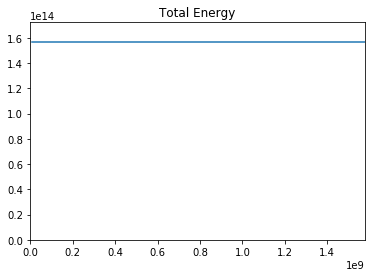

In [12]:
plt.plot(t_list,E_list)
plt.title("Total Energy")
plt.axis([0,max(t_list),0,max(E_list)*1.1])
#plt.savefig("totE.png")